# Analysis of Fifa World Cup Tournaments (1930-2022)
##### Bethel Biniam, Fall 2022
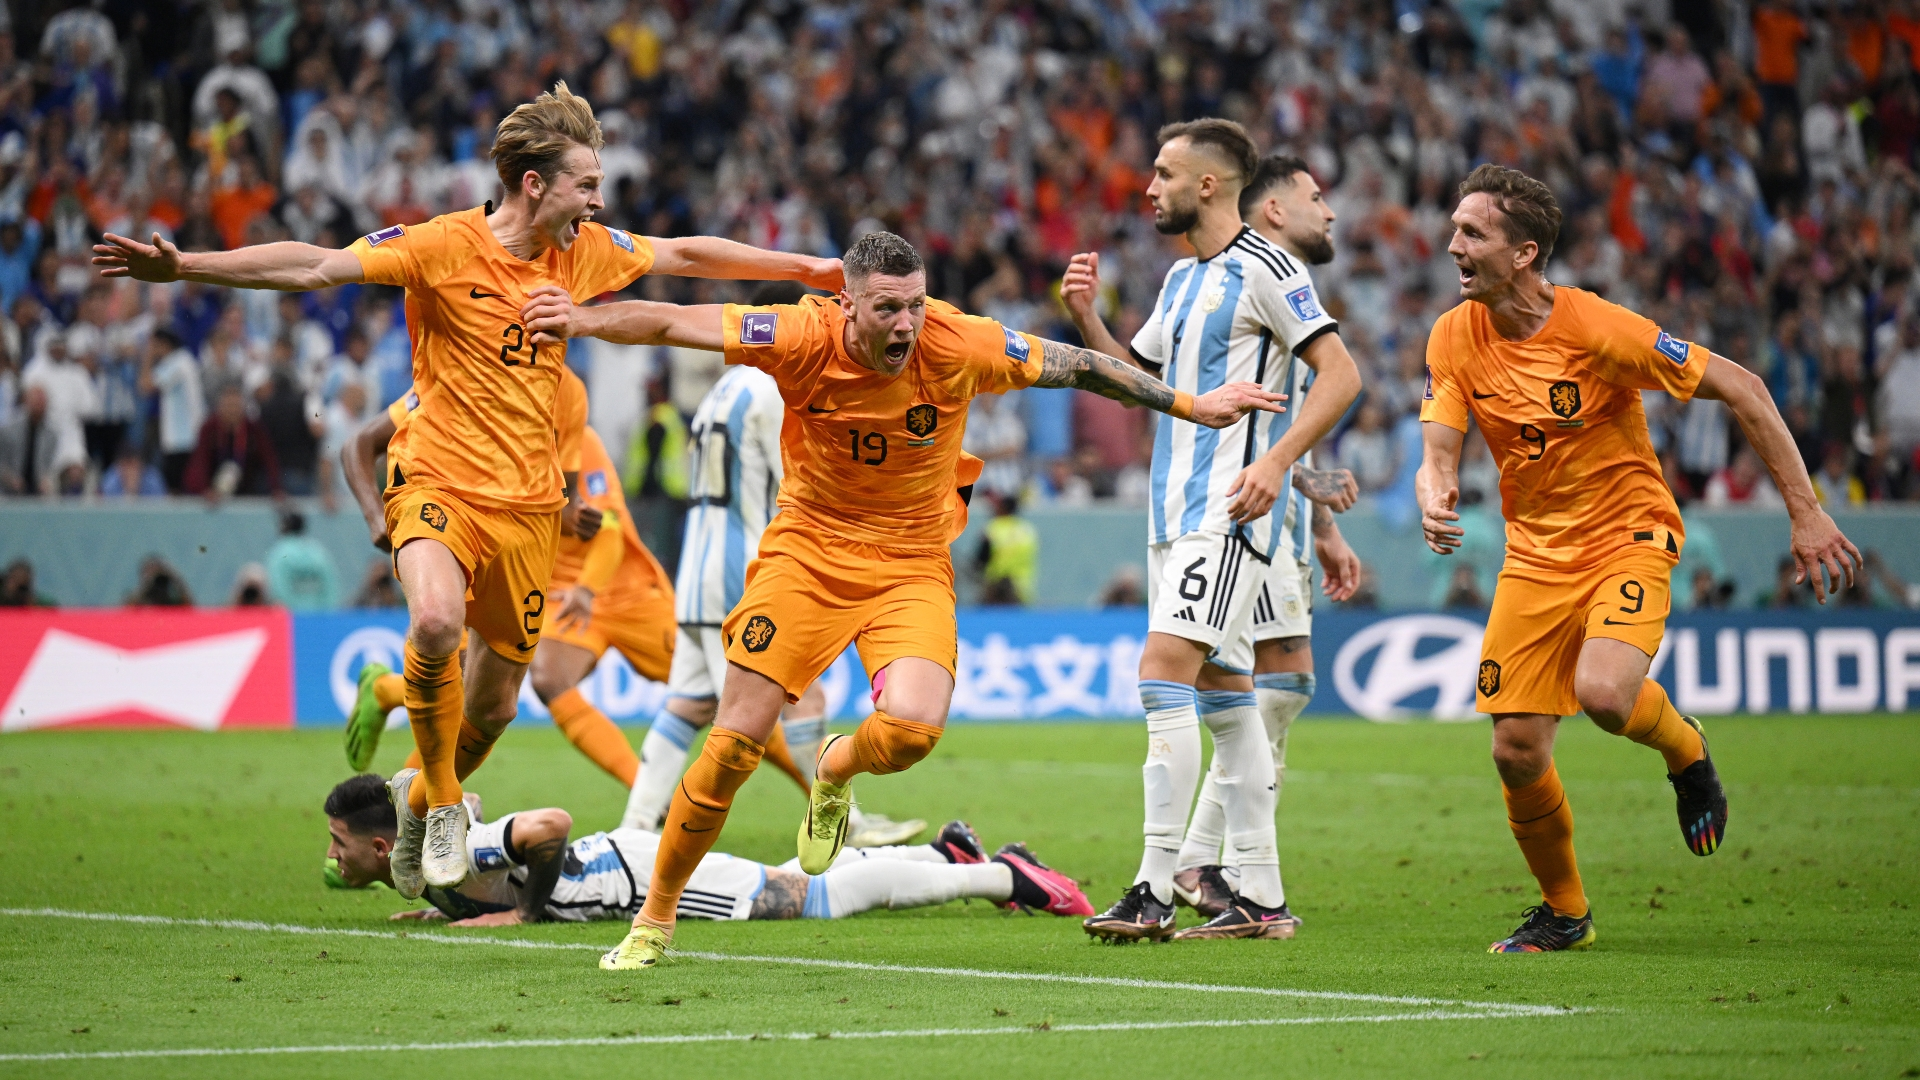
## Introduction
### Motivation
Every four years, the FIFA World Cup is held and overtakes the media for weeks. In fact, it is due to end in just a few days. As someone who enjoys it casually, just watching for the fun of the game, I was excited by the possible data analyses that could be performed on the data. What can be said about the playing teams? Are there any trends noticable? How can I examine these things?

The World Cup of 2022 has been shocking in more ways than one: dark horses like Japan and South Korea making it far into the tournament, Morocco being the first African team to make it to semi-finals, the heated match between the Netherlands and Argentina team (shown in the image above), just to name a few. 

As a computer science student, I thought the hype around the world cup would lend itself well to making my report that much more interesting to you, the reader. Follow along with me as I explore the trends of performance in the World Cup over the years, making discoveries you may expect, and some you may not. We will look at how games played out in this tournament, as well as those in previous years, all the way back to 1930.

Considering that the World Cup is not yet done as of the finalization of this report (December 16th), it is exclusive of the final games two games (Croatia v.s. Morocco, Argentina v.s. France).

This project consists of a few sections:

1. Data Collection
2. Data Management and Cleaning
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Communication of Insights


#### Required Libraries/Tools
In order to perform data analysis on this dataset, we need the help of some python libraries and APIs. The following will be used throughout the project:

1. `pandas`: used to manipulate dataframes
2. `numpy`: used to calculate statistics
3. `matplotlib`: used to create plots
4. `sklearn`: used to model regression
5. `statsmodels`: used to perform hypothesis testing
6. `pycountry`: used to translate country names to continent names. I import a specific module, `pycountry_convert` to do this.
    - In order to use this package, you will have to install it on your machine. If you're using Jupyter Notebooks like me, that can be done like below, with `! pip install pycountry_convert`, followed by the import line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
! pip install pycountry_convert
import pycountry_convert as pc
from sklearn.linear_model import LinearRegression

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


#### About the Dataset
I will be using the [**FIFA Football World Cup**](https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup) datasets in this report.

It has a few separate datasets depending on whether you want to view data from the previous tournaments (1930-2018), the current one, or general data about the teams. I will be combining two of the provided datasets: `matches_1930_2018.csv` and `matches_2022.csv`. 

Though there are many fields in this dataset, I will be narrowing them down to the ones I'm interested in analysing: 

- `home_team, away_team` - Home and Away Teams,
- `home_score, away_score` - Scores,
- `home_xg, away_xg` - XG (Expected Goals): this will be expanded on in a later section
- `home_penalty, away_penalty` - Penalties,
- `home_yellow_card_long, away_yellow_card_long` - Yellow Cards Given,
- `Date`,
- `Score`,
- `Year`

I will also create my own fields for data that I think are relevant, using the given fields to bounce off of.

#### Extra Readings/Viewings
If you want to learn more about the workings of the Fifa World Cup tournaments to better understand the analyses going forward, check out these links:

1. [**Fifa World Cup: Wikipedia**](https://en.wikipedia.org/wiki/FIFA_World_Cup)
2. [**What is Expected Goals in FIFA 22? How xG is calculated**](https://www.charlieintel.com/what-is-expected-goals-in-fifa-22-how-xg-is-calculated/142457/)
3. [**What happens if a knockout game ends in a tie? World Cup extra time and penalty shootouts, explained**](https://www.usatoday.com/story/sports/soccer/worldcup/2022/11/20/2022-qatar-world-cup-overtime-rules-penalty-shootout/10693940002/)

### 1. Data Collection

Using the `read_csv` function of `pandas`, I extract the data from both datasets and into separate dataframes. If you are interested in learning more about dataframes in `pandas`, [check out the documentation](https://pandas.pydata.org/docs/user_guide/index.html). 

After both dataframes are formed, one for past tournaments and one for the current tournament, I will start cleaning the data.

In [2]:
# Dataset of games from 1930 to 2018.
fifa_past = pd.read_csv("matches_1930_2018.csv")
fifa_past

home_team away_team  home_score  home_xg  home_penalty  away_score  \
0           France   Croatia           4      1.1           NaN           2   
1          Belgium   England           2      1.5           NaN           0   
2          Croatia   England           2      1.7           NaN           1   
3           France   Belgium           1      1.7           NaN           0   
4           Sweden   England           0      0.5           NaN           2   
..             ...       ...         ...      ...           ...         ...   
895      Argentina    France           1      NaN           NaN           0   
896     Yugoslavia    Brazil           2      NaN           NaN           1   
897        Romania      Peru           3      NaN           NaN           1   
898  United States   Belgium           3      NaN           NaN           0   
899         France    Mexico           4      NaN           NaN           1   

     away_xg  away_penalty      home_manager          home_captain  ...  \
0        1.1           NaN  Didier Deschamps           Hugo Lloris  ...   
1        1.0           NaN  Roberto Martínez           Eden Hazard  ...   
2        0.6           NaN      Zlatko Dalić           Luka Modrić  ...   
3        0.4           NaN  Didier Deschamps           Hugo Lloris  ...   
4        1.0           NaN   Janne Andersson     Andreas Granqvist  ...   
..       ...           ...               ...                   ...  ...   
895      NaN           NaN  Francisco Olazar       Manuel Ferreira  ...   
896      NaN           NaN   Bosko Simonovic       Milutin Ivković  ...   
897      NaN           NaN     Octav Luchide          Emerich Vogl  ...   
898      NaN           NaN        Bob Millar            Tom Florie  ...   
899      NaN           NaN     Raoul Caudron  Alexandre Villaplane  ...   

    home_penalty_shootout_miss_long away_penalty_shootout_miss_long  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
..                              ...                             ...   
895                             NaN                             NaN   
896                             NaN                             NaN   
897                             NaN                             NaN   
898                             NaN                             NaN   
899                             NaN                             NaN   

     home_red_card         away_red_card home_yellow_red_card  \
0              NaN                   NaN                  NaN   
1              NaN                   NaN                  NaN   
2              NaN                   NaN                  NaN   
3              NaN                   NaN                  NaN   
4              NaN                   NaN                  NaN   
..             ...                   ...                  ...   
895            NaN                   NaN                  NaN   
896            NaN                   NaN                  NaN   
897            NaN  Plácido Galindo · 70                  NaN   
898            NaN                   NaN                  NaN   
899            NaN                   NaN                  NaN   

    away_yellow_red_card                              home_yellow_card_long  \
0                    NaN  ["27&rsquor;|1:0|N'Golo Kanté", '41&rsquor;|2:...   
1                    NaN                   ['90+3&rsquor;|2:0|Axel Witsel']   
2                    NaN  ['48&rsquor;|0:1|Mario Mandžukić', '96&rsquor;...   
3                    NaN  ["87&rsquor;|1:0|N'Golo Kanté", '90+3&rsquor;|...   
4                    NaN  ['88&rsquor;|0:2|John Guidetti', '90+4&rsquor;...   
..                   ...                           

In [3]:
# Dataset of games from the 2022 World Cup so far.
fifa_2022 = pd.read_csv("matches_2022.csv")
fifa_2022

home_team    away_team  home_score  home_xg  home_penalty  away_score  \
0           Qatar      Ecuador         0.0      0.3           NaN         2.0   
1         England      IR Iran         6.0      2.1           NaN         2.0   
2   United States        Wales         1.0      0.8           NaN         1.0   
3         Senegal  Netherlands         0.0      0.9           NaN         2.0   
4          France    Australia         4.0      4.0           NaN         1.0   
..            ...          ...         ...      ...           ...         ...   
59        Morocco     Portugal         1.0      1.4           NaN         0.0   
60      Argentina      Croatia         3.0      2.3           NaN         0.0   
61         France      Morocco         2.0      1.9           NaN         0.0   
62        Croatia      Morocco         NaN      NaN           NaN         NaN   
63      Argentina       France         NaN      NaN           NaN         NaN   

    away_xg  away_penalty      home_manager       home_captain  ...  \
0       1.2           NaN     Félix Sánchez   Hassan Al-Haydos  ...   
1       1.4           NaN  Gareth Southgate         Harry Kane  ...   
2       1.5           NaN   Gregg Berhalter        Tyler Adams  ...   
3       0.7           NaN       Aliou Cissé  Kalidou Koulibaly  ...   
4       0.5           NaN  Didier Deschamps        Hugo Lloris  ...   
..      ...           ...               ...                ...  ...   
59      0.9           NaN   Hoalid Regragui       Romain Saïss  ...   
60      0.5           NaN    Lionel Scaloni       Lionel Messi  ...   
61      0.9           NaN  Didier Deschamps        Hugo Lloris  ...   
62      NaN           NaN               NaN                NaN  ...   
63      NaN           NaN               NaN                NaN  ...   

   home_penalty_shootout_miss_long away_penalty_shootout_miss_long  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   
..                             ...                             ...   
59                             NaN                             NaN   
60                             NaN                             NaN   
61                             NaN                             NaN   
62                             NaN                             NaN   
63                             NaN                             NaN   

    home_red_card away_red_card   home_yellow_red_card away_yellow_red_card  \
0             NaN           NaN                    NaN                  NaN   
1             NaN           NaN                    NaN                  NaN   
2             NaN           NaN                    NaN                  NaN   
3             NaN           NaN                    NaN                  NaN   
4             NaN           NaN                    NaN                  NaN   
..            ...           ...                    ...                  ...   
59            NaN           NaN  Walid Cheddira · 90+3                  NaN   
60            NaN           NaN                    NaN                  NaN   
61            NaN           NaN                    NaN                  NaN   
62            NaN           NaN                    NaN                  NaN   
63            NaN           NaN                    NaN                  NaN   

                                home_yellow_card_long  \
0   ['15&rsquor;|0:0|Saad Al Sheeb', '22&rsquor;|0...   
1                                                 NaN   
2   ['11&rsquor;|0:0|Sergiño Dest', '13&rsquor;|0:...   
3   ['90+4&rsquor;|0:1|Nampalys Mendy', '90+6&rsqu...   
4                                                 NaN   
..                                                

### 2. Data Management and Cleaning
Data cleansing is a messy process of 
> "identifying the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and then modifying, replacing or deleting them according to the necessity." 

It is an integral part of the Data Science Pipeline. To learn more, visit [**What is Data Cleaning? How to Process Data for Analytics and Machine Learning Modeling?**](https://towardsdatascience.com/what-is-data-cleaning-how-to-process-data-for-analytics-and-machine-learning-modeling-c2afcf4fbf45)

I cannot yet join the `fifa_past` and `fifa_2022` dataframes, since I intend to perform some analysis on each specific set of data. Thus, the following cleansing will appear duplicated, since I perform it for both datasets.

#### Part 1: Converting Yellow Card Field to Numerical Value
Given the tension in this year's World Cup, especially between the Netherlands and Argentina, I was immediately interested in preserving this field to analyze in depth later. However, the yellow card attribute appears to be corrupted or in a form that could not be read properly.

There is some sense to it, though. It appears to be in list form, but given as a string. By parsing it and turning it into a list, then taking the length, we get the number of yellow cards given.

In [4]:
# For each past game...
for ind, game in fifa_past.iterrows():        

    # If the away team received Yellow Cards...
    if pd.notnull(game['away_yellow_card_long']): 
        
        # Strip the array brackets, and split on the comma character, then take the length of that list
        fifa_past.loc[ind, 'away_yellows'] = len(str((game['away_yellow_card_long'])).strip('][').split(', '))
    else: 
        # If there were no yellow cards given in this game, insert 0
        fifa_past.loc[ind, 'away_yellows'] = 0
        
    if pd.notnull(game['home_yellow_card_long']): # Same process for the home team
        fifa_past.loc[ind, 'home_yellows'] = len(str((game['home_yellow_card_long'])).strip('][').split(', '))
    else: 
        fifa_past.loc[ind, 'home_yellows'] = 0
        
    
# Same process as above, but for the 2022 dataset
for ind, game in fifa_2022.iterrows():
    if pd.notnull(game['away_yellow_card_long']): # away
        fifa_2022.loc[ind, 'away_yellows'] = len(str((game['away_yellow_card_long'])).strip('][').split(', '))
    else: 
        fifa_2022.loc[ind, 'away_yellows'] = 0
        
    if pd.notnull(game['home_yellow_card_long']): # home
        fifa_2022.loc[ind, 'home_yellows'] = len(str((game['home_yellow_card_long'])).strip('][').split(', '))
    else: 
        fifa_2022.loc[ind, 'home_yellows'] = 0
        

#### Part 2: Adding the Continent Field
The dataset in its current form provides us with a lot of interesting information, but we can step it up a notch. I am interested in finding out what trends may be prevalent when we look at the continent that each team is from. To that end, I use the `pycountry_convery` module installed in the beginning to convert team/country names to continent names. This must be done for both the home and away team.

However, not all team names are the name of the country from which they're from. In those cases, `pycountry_convert` will throw a **KeyError**. For the time being, I will catch that error and place 'TBD' (to be determined) in the field.

In [5]:
# Converts given team/country name to the continent that the team is from
def country_to_continent(country_name):
    country_a2 = pc.country_name_to_country_alpha2(country_name) # 2 letter code
    country_continent_code = pc.country_alpha2_to_continent_code(country_a2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# For each past game...
for ind, game in fifa_past.iterrows(): 
    
    # Try using pycountry_convert to provide the continent of that team, and assign it if possible
    try:
        fifa_past.loc[ind, 'home_continent'] = country_to_continent(game['home_team'])
    except KeyError:
        # Label teams not named after their country with TBD
        fifa_past.loc[ind, 'home_continent'] = 'TBD'
        
    # Repeating the process for the away team
    try:
        fifa_past.loc[ind, 'away_continent'] = country_to_continent(game['away_team'])
    except KeyError:
        fifa_past.loc[ind, 'away_continent'] = 'TBD'
        
    
# Same process as above for the 2022 dataset
for ind, game in fifa_2022.iterrows(): 
    try:
        fifa_2022.loc[ind, 'home_continent'] = country_to_continent(game['home_team'])
    except KeyError:
        fifa_2022.loc[ind, 'home_continent'] = 'TBD'
        
    try:
        fifa_2022.loc[ind, 'away_continent'] = country_to_continent(game['away_team'])
    except KeyError:
        fifa_2022.loc[ind, 'away_continent'] = 'TBD'
    

There are quite a few teams that aren't named after their country, or are named slightly differently, or no longer exist at all! That is to be expected since the World Cup has been around since the 1930s. There are several teams and regions that no longer go by the names they used to.

For each of these teams, I personally assign them to the continent they belong, or *belonged*, to. I then go back through looking for every TBD field and assign the proper continent to the respective team.

In [6]:
# Mini dataframes for both home and away teams with TBD in the column field
home_tbd = fifa_past[fifa_past['home_continent'] == 'TBD']
away_tbd = fifa_past[fifa_past['away_continent'] == 'TBD']

# This is the list of teams/countries that no longer exist, or go by have different names
tbd = away_tbd['away_team'].unique() 

# Using the above variable, I assign each team to the continent they are from
conts = {'Europe': ['England', 'Wales', 'Scotland', 'Germany DR', 'Soviet Union', 'Yugoslavia', 'Czechoslovakia', 
                    'FR Yugoslavia', 'West Germany', 'Republic of Ireland', 'Northern Ireland', 'Serbia and Montenegro'], 
         'Asia': ['Korea Republic', 'Dutch East Indies', 'IR Iran', 'Korea DPR', 'Türkiye', 'China PR'], 'Africa': ['Zaire']}

# For each game...
for ind, game in fifa_past.iterrows():
    # If the continent is not listed for this team
    if game['home_continent'] == 'TBD':
        
        # Looking for the continent that has this team's name in it
        for c in conts:
            if game['home_team'] in conts[c]:
                fifa_past.loc[ind, 'home_continent'] = c  # Assigning the proper continent to the team
          
        
# Same process for the away TBD teams
for ind, game in fifa_past.iterrows():
    if game['away_continent'] == 'TBD':
        for c in conts:
            if game['away_team'] in conts[c]:
                fifa_past.loc[ind, 'away_continent'] = c
            

Below, the process is repeated to assign a continent to the team names that do not yet have one.

In [7]:
# Similar to above, but for the 2022 dataset
for ind, game in fifa_2022.iterrows():
    if game['home_continent'] == 'TBD':
        for c in conts:
            if game['home_team'] in conts[c]:
                fifa_2022.loc[ind, 'home_continent'] = c
                
for ind, game in fifa_2022.iterrows():
    if game['away_continent'] == 'TBD':
        for c in conts:
            if game['away_team'] in conts[c]:
                fifa_2022.loc[ind, 'away_continent'] = c

#### Part 3. Winner Column and Continent TODO explain continent everywhere too
The current dataset does not take into account the winner of any given game. I think it would be interesting to perform analysis on in the future, so we are going to create that column ourselves. The winner of a game will be calculated in one of three ways:

1. The team that scored most points, wins
2. In the event of a tie, and the game had a penalty shootout, the team with the most penalties wins
3. In the event of a tie, and there was no penalty shootout, the game ended in a draw

Draws were used in the elimination rounds to determine which teams in a group would advance to the round of the final 16. After making it into the final 16, there are no draws.

Aside from assigning the winner of each game, I will also assign the continent of the winner in another field.

In [8]:
# For each game...
for ind, game in fifa_past.iterrows():
    
    # If there is a tie...
    if game['home_score'] == game['away_score']:
        
        # If there were no penalty shootouts, the game was a DRAW
        if pd.isnull(game['home_penalty']):
            win_cont = 'DRAW'
            win = 'DRAW'
            
        # Else, the winning team is the team with the most penalties scored
        elif game['home_penalty'] > game['away_penalty']:
            win_cont = game['home_continent']
            win = game['home_team']
        else:
            win_cont = game['away_continent']
            win = game['away_team']
            
    # If there was no tie, the winning team is the team with the most points scored        
    else:
        if game['home_score'] > game['away_score']:
            win_cont = game['home_continent']
            win = game['home_team']
        else: 
            win_cont = game['away_continent']
            win = game['away_team']
            
    fifa_past.loc[ind, 'winner_cont'] = win_cont  # Assigning the name/cont of the winning team
    fifa_past.loc[ind, 'winner'] = win  
    
    
# Repeat for the 2022 dataset
for ind, game in fifa_2022.iterrows():
    if game['home_score'] == game['away_score']:
        if pd.isnull(game['home_penalty']):
            win_cont = 'DRAW'
            win = 'DRAW'
        elif game['home_penalty'] > game['away_penalty']:
            win_cont = game['home_continent']
            win = game['home_team']
        else:
            win_cont = game['away_continent']
            win = game['away_team']
            
    else:
        if game['home_score'] > game['away_score']:
            win = game['home_team']
            win_cont = game['home_continent']
        else: 
            win_cont = game['away_continent']
            win = game['away_team']
         
    fifa_2022.loc[ind, 'winner_cont'] = win_cont
    fifa_2022.loc[ind, 'winner'] = win
    

I elect to insert the term 'DRAW' into the games that ended with a draw. Instead of this, you could fill in the value of `np.nan`, which may help more with computation in the future. I find having the term 'DRAW' is more informational than 'NaN' for explanatory purposes.

#### Part 4: Reducing Fields
The dataset came with 44 fields of data included, but we don't want to keep too many of those. I narrow down the fields to the ones I am most interested in/created. This includes scores, penalties, expected goals, year, and yellow card information.

In [9]:
# Columns I'm interested in
cols = ['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty', 'away_score', 'away_xg', 'away_penalty',  
        'Score', 'Year', 'home_yellow_card_long', 'away_yellow_card_long']

# Columns I created
created = ['away_yellows', 'home_yellows', 'home_continent', 'away_continent', 'winner', 'winner_cont']

# Removing the detailed descriptions of yellow cards
yellow_long = ['home_yellow_card_long', 'away_yellow_card_long']

# Selecting only the fields in 'col' as well as the ones I created
new_cols = [attr for attr in (cols + created) if attr not in yellow_long]
fifa_past = fifa_past[new_cols]
fifa_2022 = fifa_2022[new_cols]  # Reducing the dimensionality of the dataset.

fifa_past

home_team away_team  home_score  home_xg  home_penalty  away_score  \
0           France   Croatia           4      1.1           NaN           2   
1          Belgium   England           2      1.5           NaN           0   
2          Croatia   England           2      1.7           NaN           1   
3           France   Belgium           1      1.7           NaN           0   
4           Sweden   England           0      0.5           NaN           2   
..             ...       ...         ...      ...           ...         ...   
895      Argentina    France           1      NaN           NaN           0   
896     Yugoslavia    Brazil           2      NaN           NaN           1   
897        Romania      Peru           3      NaN           NaN           1   
898  United States   Belgium           3      NaN           NaN           0   
899         France    Mexico           4      NaN           NaN           1   

     away_xg  away_penalty Score  Year  away_yellows  home_yellows  \
0        1.1           NaN   4–2  2018           1.0           2.0   
1        1.0           NaN   2–0  2018           2.0           1.0   
2        0.6           NaN   2–1  2018           1.0           2.0   
3        0.4           NaN   1–0  2018           3.0           2.0   
4        1.0           NaN   0–2  2018           1.0           2.0   
..       ...           ...   ...   ...           ...           ...   
895      NaN           NaN   1–0  1930           0.0           0.0   
896      NaN           NaN   2–1  1930           0.0           0.0   
897      NaN           NaN   3–1  1930           0.0           0.0   
898      NaN           NaN   3–0  1930           0.0           0.0   
899      NaN           NaN   4–1  1930           0.0           0.0   

    home_continent away_continent         winner    winner_cont  
0           Europe         Europe         France         Europe  
1           Europe         Europe        Belgium         Europe  
2           Europe         Europe        Croatia         Europe  
3           Europe         Europe         France         Europe  
4           Europe         Europe        England         Europe  
..             ...            ...            ...            ...  
895  South America         Europe      Argentina  South America  
896         Europe  South America     Yugoslavia         Europe  
897         Europe  South America        Romania         Europe  
898  North America         Europe  United States  North America  
899         Europe  North America         France         Europe  

[900 rows x 16 columns]

In [10]:
fifa_2022

home_team    away_team  home_score  home_xg  home_penalty  away_score  \
0           Qatar      Ecuador         0.0      0.3           NaN         2.0   
1         England      IR Iran         6.0      2.1           NaN         2.0   
2   United States        Wales         1.0      0.8           NaN         1.0   
3         Senegal  Netherlands         0.0      0.9           NaN         2.0   
4          France    Australia         4.0      4.0           NaN         1.0   
..            ...          ...         ...      ...           ...         ...   
59        Morocco     Portugal         1.0      1.4           NaN         0.0   
60      Argentina      Croatia         3.0      2.3           NaN         0.0   
61         France      Morocco         2.0      1.9           NaN         0.0   
62        Croatia      Morocco         NaN      NaN           NaN         NaN   
63      Argentina       France         NaN      NaN           NaN         NaN   

    away_xg  away_penalty Score  Year  away_yellows  home_yellows  \
0       1.2           NaN   0–2  2022           2.0           4.0   
1       1.4           NaN   6–2  2022           2.0           0.0   
2       1.5           NaN   1–1  2022           2.0           4.0   
3       0.7           NaN   0–2  2022           1.0           2.0   
4       0.5           NaN   4–1  2022           3.0           0.0   
..      ...           ...   ...   ...           ...           ...   
59      0.9           NaN   1–0  2022           1.0           2.0   
60      0.5           NaN   3–0  2022           2.0           2.0   
61      0.9           NaN   2–0  2022           1.0           0.0   
62      NaN           NaN   NaN  2022           0.0           0.0   
63      NaN           NaN   NaN  2022           0.0           0.0   

   home_continent away_continent       winner    winner_cont  
0            Asia  South America      Ecuador  South America  
1          Europe           Asia      England         Europe  
2   North America         Europe         DRAW           DRAW  
3          Africa         Europe  Netherlands         Europe  
4          Europe        Oceania       France         Europe  
..            ...            ...          ...            ...  
59         Africa         Europe      Morocco         Africa  
60  South America         Europe    Argentina  South America  
61         Europe         Africa       France         Europe  
62         Europe         Africa      Morocco         Africa  
63  South America         Europe       France         Europe  

[64 rows x 16 columns]

#### Part 5: Combining the Datasets
Now that all the cleansing has been done to both datasets, it's time to combine them. This is done easily with a function from `pandas` called `concat`. Taking two dataframes as parameters, it returns one that has the data of both of them. WHile we're at it, let's remove the two games that haven't been played yet by excluding rows with null `home_score` values.

I also take this opportunity to add one more field: `yellows`. This field sums the number of yellow cards received by the home and away teams. It is useful for analyzing the number of yellow cards given in a single game. This column could be done without, but it simplifies computation later on when we want to look at yellow cards for entire games rather than single teams.

In [11]:
# Combined dataset for the Fifa World Cups
fifa = pd.concat([fifa_2022[pd.notnull(fifa_2022['home_score'])], fifa_past]).reset_index(drop=True)
fifa['yellows'] = fifa['home_yellows'] + fifa['away_yellows']
fifa

home_team    away_team  home_score  home_xg  home_penalty  \
0            Qatar      Ecuador         0.0      0.3           NaN   
1          England      IR Iran         6.0      2.1           NaN   
2    United States        Wales         1.0      0.8           NaN   
3          Senegal  Netherlands         0.0      0.9           NaN   
4           France    Australia         4.0      4.0           NaN   
..             ...          ...         ...      ...           ...   
957      Argentina       France         1.0      NaN           NaN   
958     Yugoslavia       Brazil         2.0      NaN           NaN   
959        Romania         Peru         3.0      NaN           NaN   
960  United States      Belgium         3.0      NaN           NaN   
961         France       Mexico         4.0      NaN           NaN   

     away_score  away_xg  away_penalty Score  Year  away_yellows  \
0           2.0      1.2           NaN   0–2  2022           2.0   
1           2.0      1.4           NaN   6–2  2022           2.0   
2           1.0      1.5           NaN   1–1  2022           2.0   
3           2.0      0.7           NaN   0–2  2022           1.0   
4           1.0      0.5           NaN   4–1  2022           3.0   
..          ...      ...           ...   ...   ...           ...   
957         0.0      NaN           NaN   1–0  1930           0.0   
958         1.0      NaN           NaN   2–1  1930           0.0   
959         1.0      NaN           NaN   3–1  1930           0.0   
960         0.0      NaN           NaN   3–0  1930           0.0   
961         1.0      NaN           NaN   4–1  1930           0.0   

     home_yellows home_continent away_continent         winner    winner_cont  \
0             4.0           Asia  South America        Ecuador  South America   
1             0.0         Europe           Asia        England         Europe   
2             4.0  North America         Europe           DRAW           DRAW   
3             2.0         Africa         Europe    Netherlands         Europe   
4             0.0         Europe        Oceania         France         Europe   
..            ...            ...            ...            ...            ...   
957           0.0  South America         Europe      Argentina  South America   
958           0.0         Europe  South America     Yugoslavia         Europe   
959           0.0         Europe  South America        Romania         Europe   
960           0.0  North America         Europe  United States  North America   
961           0.0         Europe  North America         France         Europe   

     yellows  
0        6.0  
1        2.0  
2        6.0  
3        3.0  
4        3.0  
..       ...  
957      0.0  
958      0.0  
959      0.0  
960      0.0  
961      0.0  

[962 rows x 17 columns]

### 3. Exploratory data analysis
#### Part 1: Summary Statistics
All the cleaning is over and done with. Now, we can start with data analysis. The first thing I would like to do is calculate the summary statistics of a few fields. Summary statistics are useful for getting a glance at the distribution of the data without creating any plots first.

Namely, we will look at summary stats for `home_score`, `away_score`, and `yellows`. This process is made simple by using the `numpy` provided functions to calculate mean, median, minimum, maximum, and standard deviation. Alternatively, you can use the `pandas` method `describe`, which can produce summary statistics in a very clean way. I avoided using it because it includes stats I'm not interested in, but you can try it out and decide for yourself!

To learn more about summary statistics and their uses, check out [**Summary statistics**](https://www.cuemath.com/data/summary-statistics/).

In [12]:
# Summary Stats for Home Score
mean = np.mean(fifa['home_score'])
median = np.median(fifa['home_score'])
mini = np.min(fifa['home_score'])
maxi = np.max(fifa['home_score'])
stddev = np.std(fifa['home_score'])

print('Summary Stats for HOME SCORE')
print('----------------------------------')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

Summary Stats for HOME SCORE
----------------------------------
Mean:  1.7754677754677755 
Std Dev:  1.597002467430215 
Median:  1.0 
Min:  0.0 
Max:  10.0


In [13]:
# Summary Stats for Away Score
mean = np.mean(fifa['away_score'])
median = np.median(fifa['away_score'])
mini = np.min(fifa['away_score'])
maxi = np.max(fifa['away_score'])
stddev = np.std(fifa['away_score'])

print('Summary Stats for AWAY SCORE')
print('----------------------------------')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

Summary Stats for AWAY SCORE
----------------------------------
Mean:  1.0426195426195426 
Std Dev:  1.0699314095569636 
Median:  1.0 
Min:  0.0 
Max:  7.0


In [14]:
# Summary Stats for Yellows Combined
mean = np.mean(fifa['away_yellows'] + fifa['home_yellows'])
median = np.median(fifa['away_yellows'] + fifa['home_yellows'])
mini = np.min(fifa['away_yellows'] + fifa['home_yellows'])
maxi = np.max(fifa['away_yellows'] + fifa['home_yellows'])
stddev = np.std(fifa['away_yellows'] + fifa['home_yellows'])

print('Summary Stats for YELLOWS COMBINED')
print('----------------------------------')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

Summary Stats for YELLOWS COMBINED
----------------------------------
Mean:  2.6715176715176714 
Std Dev:  2.347688646183192 
Median:  2.0 
Min:  0.0 
Max:  17.0


It seems apparent right away that yellow cards have an outlier of 17, given the mean and standard deviation are around 2. Similarly, home scores and away scores have low mean and standard deviation values, but maximum values that imply outliers. It isn't hard to believe that few teams score a lot, while most teams score little or not at all.

#### Part 2: Visualizing Distributions
For this next section, we will be visualising the data using plots, courtesy of the `matplotlib` library. Each plot will seek to answer a question involving one or more fields in the dataset. Our goal here is to notice any trends.

##### **Question 1**: How have scores changed over time? 
Preliminarily, I will use a scatter plot to display data plotting scores against time. The x-axis will be the year of the game, and the y-axis will have the number of points scored in the game. This information will be split into two plots, one for the home team, and one for the away team. Having two graphs side by side is something that can be done using the very helpful function `subplots`. 

Using `subplots` is more advantageous than using `subplot` since we can standardize the length of the y axis across both plots. Normally, a plot will have a y axis that is approximately the range of the data. Since the range of points scored in this case is different between home and away teams, it would be misleading to see the two graphs with different y ranges. Using subplots fixes that.

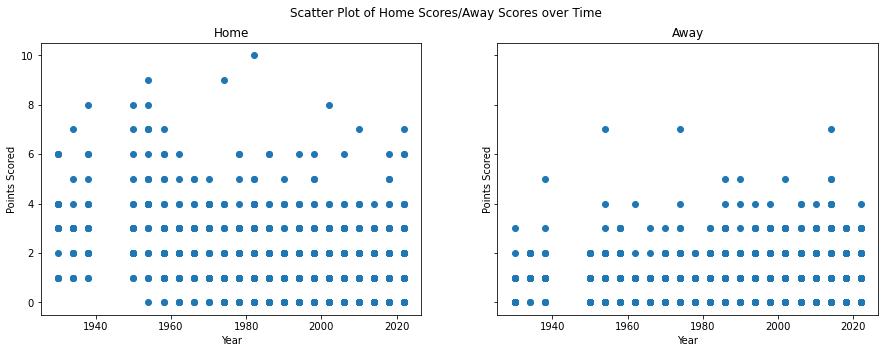

In [15]:
# Graphing year by points scored, using helpful function subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True) 
fig.suptitle('Scatter Plot of Home Scores/Away Scores over Time')
ax1.scatter(fifa['Year'], fifa['home_score'])
ax2.scatter(fifa['Year'], fifa['away_score'])

# Labelling each plot
ax1.set_xlabel("Year")
ax1.set_ylabel("Points Scored")
ax1.set_title("Home")

ax2.set_xlabel("Year")
ax2.set_ylabel("Points Scored")
ax2.set_title("Away")

plt.show()

It looks like a scatter plot is not the best plot to use for the data. As you can see, the values of `home_score` and `away_score` are always whole numbers. It's also impossible to tell which amount of points scored has the highest concentration. To improve this idea, we can use another plot: the [**Violin Plot**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

##### **Question 1 (Cont)**
The above idea had prospect, but a scatter plot is not the best plot to use here. Instead, a violin plot works similarly, yet gives more information. It displays the distribution of the variable in the y-axis for each value of the variable in the x-axis. A violin plot also provides the mean value for the distribution as a horizontal line through the 'violin'. If you're confused, you'll understand when you see it.

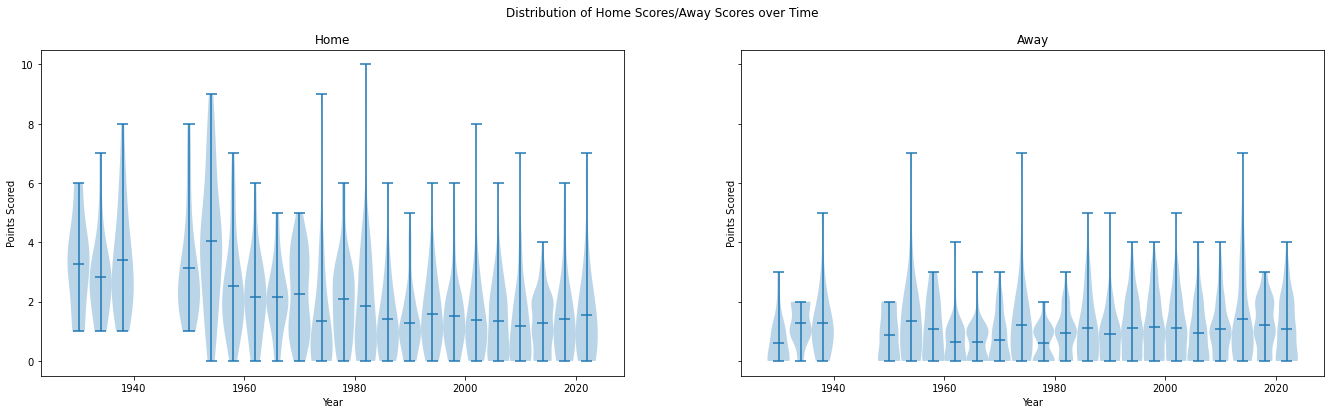

In [16]:
# For each year, we need to collect the scores of that year into an array (one for home and one for away teams)
years = sorted(list(fifa['Year'].unique()))
home_scores = []
away_scores = []

# For each year, append a list of the scores for each team
for y in years:
    home_scores.append( list(fifa[fifa['Year'] == y]['home_score']) )
    away_scores.append( list(fifa[fifa['Year'] == y]['away_score']) )

# Using subplots to create two plots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6), sharey=True)
fig.suptitle('Distribution of Home Scores/Away Scores over Time')
ax1.violinplot(home_scores, years, widths=4,showmeans=True)
ax2.violinplot(away_scores, years, widths=4,showmeans=True)

# Labelling
ax1.set_xlabel("Year")
ax1.set_ylabel("Points Scored")
ax1.set_title("Home")

ax2.set_xlabel("Year")
ax2.set_ylabel("Points Scored")
ax2.set_title("Away")

plt.show()

With a violin plot, it is much clearer how the data is distributed each year. Looks like there is a difference between the distributions for teams that are listed as home or away. Perhaps it's the case that even being labelled as an away team has a negative effect on performance? It also seems that home team scored points trend downwards over time. 

You might also notice that there is a gap in data between 1940 and 1950. You may not have thought about it before now, but those years line up with the timeline of World War II and the aftermath. It then makes a lot of sense that we weren't holding a world tournament at a time like that!

##### **Question 2**: What is the distribution of yellow cards over the years like?
For this question, a violin plot is also very effective. We want to see the distribution of yellow cards received each year, since their invention. Yellow (and red) cards started being used in the 1970 World Cup, although a similar mechanism of eliminating players was used since the 1950 tournament. See [this wikipedia article](https://en.wikipedia.org/wiki/1970_FIFA_World_Cup#:~:text=For%20the%20first%20time%20at%20a%20World%20Cup%20Finals%2C%20referees%20could%20issue%20yellow) for more information.

For this question, it might be more effective to examine total yellow cards given in a game, rather than per home or away team. Luckily, we have already created a column for game-wide yellow cards.

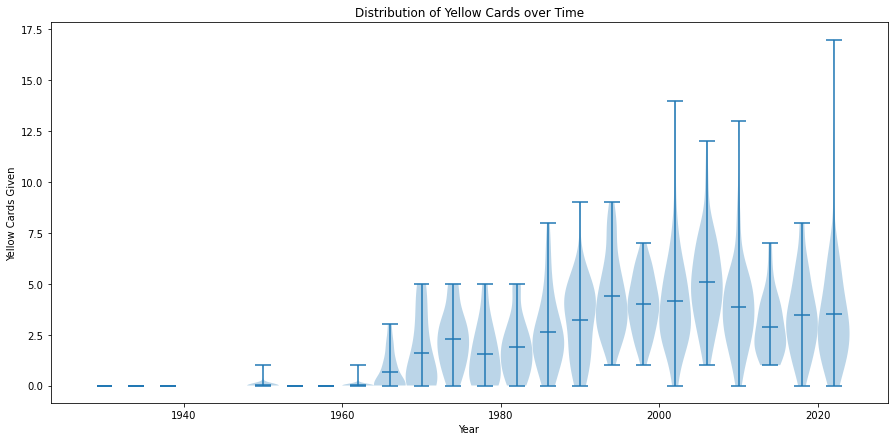

In [17]:
# List of yellow cards
yellows = []

# For each year...
for y in years:
    curr = fifa[fifa['Year'] == y]
    yellows.append( list(curr['yellows']) ) # Append a list of the number of yellow cards given that year per team
    
fig, ax = plt.subplots(figsize=(15, 7))
ax.violinplot(yellows, years, widths=4,showmeans=True)  # Creating the violin plot

# Labelling
ax.set_xlabel("Year")
ax.set_ylabel("Yellow Cards Given")
ax.set_title("Distribution of Yellow Cards over Time")

plt.show()

The maximum number of yellow cards given in games, since the conception of the idea, has drastically increased over time. From a minimum of 0 to a maximum of 17 in a single game! (That game being the match between Netherlands and Argentina.)

It's also true that the mean number of yellow cards given has increased over time (according to the horizontal line of each violin), though it fluctuates towards recent years.

##### **Question 3**: What group of continents has the most winners?
Using the `winner_cont` field, we can count the number of wins for each continent over the entire history of the World Cup. For this, we will be removing every game that was a DRAW. Optionally, you could leave it in if you're interested in the number of games ending in a DRAW, but I'd like to focus on the continents only.

I prefer using a horizontal bar graph here because of the conservation of space. Since the counts are quite large, it's a better idea to have them extend sideways than upwards for full grasp of the numbers.

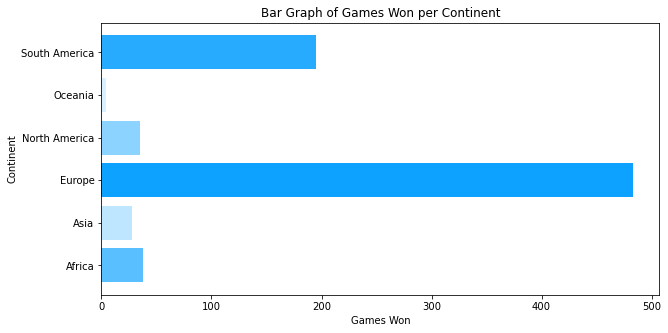

In [18]:
# Winners are counted per continent, and converted to a dictionary
winners = fifa.groupby(by='winner_cont')['winner'].agg('count').to_dict()
winners.pop('DRAW')  # removing games that ended with a DRAW

# Keys: number of wins
# Values: the continents themselves
x_axis = list(winners.keys())
y_axis = list(winners.values())
clrs = ['#59bfff', '#bfe6ff', '#0da2ff', '#8cd3ff', '#d9f1ff', '#26abff']  # a range of blues

# Plotting with a horizonal bar graph
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(x_axis, y_axis, color=clrs)

# Labelling
ax.set_xlabel("Games Won")
ax.set_ylabel("Continent")
ax.set_title("Bar Graph of Games Won per Continent")

plt.show()

From a quick glance, Europe completely wipes out the rest of the other continents, with South America less than halfway behind. Don't be misled by these results though; Europe and South America have many more teams than the other continents. More details about this are given later.

##### **Question 4**: How have the lead teams of 2022 done in the past?
Now that the semi finals are underway, the top 4 teams of this years World Cup are: Morocco and Croatia (competing against each other for third place), France, and Argentina. I will create a line graph to depict the number of games these teams won in the past years. This is to get a sense for whether it may have been unexpected for these teams to make it this far, or if it was likely based on past games.

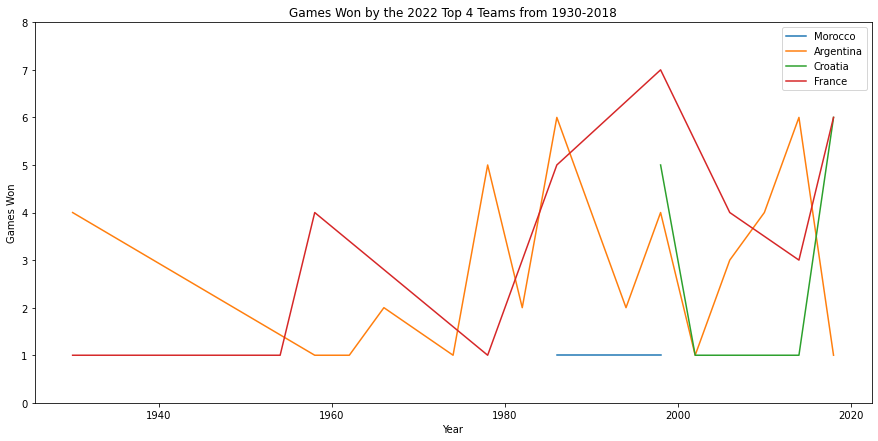

In [19]:
# Leading 4 teams of the 2022 World Cup
leads = ['Morocco', 'Argentina', 'Croatia', 'France']
plt.figure(figsize=(15, 7))

# For each team
for l in leads:
    
    # A dataframe of the wins for a specific team
    curr = fifa_past[fifa_past['winner'] == l].copy()
    
    # Counting games won by that team with a groupby and aggregate
    per_year = curr.groupby(by='Year')['winner_cont'].agg('count')

    plt.plot(per_year, label = l)  # Plotting, with a label for each line
    plt.legend()    
    
# Labelling
plt.title('Games Won by the 2022 Top 4 Teams from 1930-2018')
plt.xlabel('Year')
plt.ylabel('Games Won') 
plt.ylim([0, 8])

plt.show()

Since I am not analyzing the DRAWS of any team, these numbers imply that the teams made it past the eliminaries and into the final 16 bracket.

It seems that Argentina and France have done well in the World Cup since very early on, though their performance fluctuates. Croatia is also a team that does well in the World Cup historically (the country was formed in 1991, so the track record is reasonably short). Meanwhile, Morocco is a country that has not done as well throughout the tournaments, only winning one game max in the round of 16. Despite this, it has managed to secure a spot as top 4 teams this year.

##### **Question 5**: How are Yellow Cards split between Continents?
This final segment will use pie charts and focus on the trend between continents and points earned, as well as with yellow cards given.

I prefer the method of using a pie chart here because the number of points reaches large numbers. I find it is more interesting to look at the decomposition of those points across continents as part of a whole. If you are interested in using another type of plot, bar graphs with the specific number of points are also a possibility.

We start with continents v.s. yellow card distribution. This is done by grouping cards earned per continent and summing them up. For each team, whether they were home or away, the number of yellow cards is counted up. In honor of the fact that we are plotting information about yellow cards, the pie chart is colored with shades of yellow.

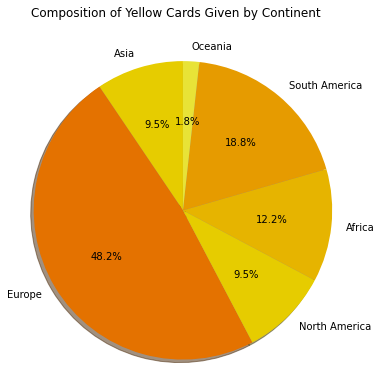

In [20]:
# Set of continent names
labels = tuple(list(fifa['home_continent'].unique()))
sizes = []  # to be the sum of yellow cards earned

# For each continent...
for l in labels:
    
    # Add the number of cards earned by a team when they were 'home' + the cards earned by that team when they were 'away'
    sizes.append( sum(fifa[fifa['home_continent'] == l]['home_yellows'] ) 
                 + sum(fifa[fifa['away_continent'] == l]['away_yellows'] ) )
    
# Plotting, labelling
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Composition of Yellow Cards Given by Continent')

clrs = ['#e6cc00', '#e47200', '#e6cc00', '#e6b400', '#e69b00', '#e8e337'] # a range of yellow values

# Creating the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=clrs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Europe appears to be the continent with the most yellow cards given, with South America and Africa trailing behind much further. However, this chart does not take into account the amount of teams in each continent. This is something that we will explore soon.

##### **Question 6**: How are Points Scored split between Continents?
Like the above chart, we are going to do similar, but with points scored instead of yellow cards recieved. This is done by grouping points scored per continent and summing them up.

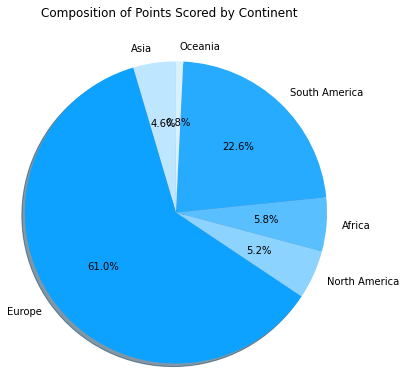

In [21]:
# Scores per continent
scores = []

# For each continent...
for l in labels:
    
    # Add points scored by teams in those continent, whether they are away or home
    scores.append( sum(fifa[fifa['home_continent'] == l]['home_score'] ) 
                  + sum(fifa[fifa['away_continent'] == l]['away_score'] ) )
    
# Plotting, labelling
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Composition of Points Scored by Continent')

clrs = ['#bfe6ff', '#0da2ff', '#8cd3ff', '#59bfff', '#26abff', '#d9f1ff'] # a range of blue values

# Creating the pie chart
ax.pie(scores, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=clrs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This chart looks quite similar to the previous one with yellow cards given. Europe is majorly in the lead, with South America and the other continents further behind. 

But these charts are a bit misleading. Europe is a country that has many more teams in the world than the other Continents. This is shown below, where I count the number of listed teams per continent.

In [22]:
# Home teams per continent, counted up using a groupby and aggregation
home_teams = fifa.groupby('home_continent')['home_team'].agg('count')
home_hash = home_teams.to_dict()

# Away teams per continent, counted up using a groupby and aggregation
away_teams = fifa.groupby('away_continent')['away_team'].agg('count')
away_hash = away_teams.to_dict()

home_teams  # the output of home_teams, for example

home_continent
Africa            69
Asia              57
Europe           551
North America     55
Oceania            9
South America    221
Name: home_team, dtype: int64

It might be more interesting to look at how much each continent contributes to the World Cup if divided by the total number of teams in each continent. For example, with points scored in mind:

> `(points scored per continent)`  / `(number of teams in continent)` = `approx. the number of points scored by one team in the continent`

This will give us a better picture on how each continent fares in the World Cup, both with points scored and yellow cards received.


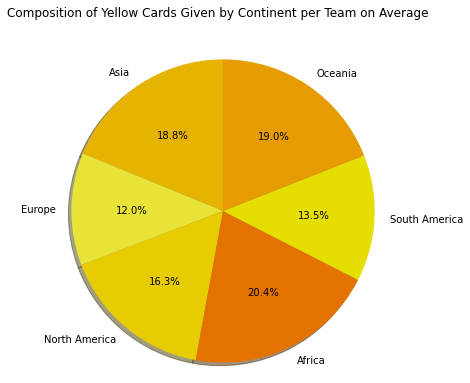

In [23]:
# Yellows by Continent with respect to number of teams
labels = tuple(list(fifa['home_continent'].unique()))
sizes = []

# For each continent, calculate the above equation
for l in labels:
    sizes.append( ( sum(fifa[fifa['home_continent'] == l]['home_yellows']) / home_hash[l] )
                 + ( sum(fifa[fifa['away_continent'] == l]['away_yellows']) / away_hash[l] ) )
    
# Plotting, labelling
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Composition of Yellow Cards Given by Continent per Team on Average')

clrs = ['#e6b400',  '#e8e337', '#e6cc00', '#e47200','#e5de00', '#e69b00'] # a range of yellow values

# Creating the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=clrs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The composition of the pie chart has changed. Now, Africa seems to be the continent that receives the most yellow cards on average. This is closely followed by Oceania and Asia. In contrast, now Europe is the continent with the least yellow cards on average. This could be attributable to the fact that Europe has much more teams than the other continents.

Doing the same process for the pie chart of points scored, we will see how things might have changed when number of teams is factored in.

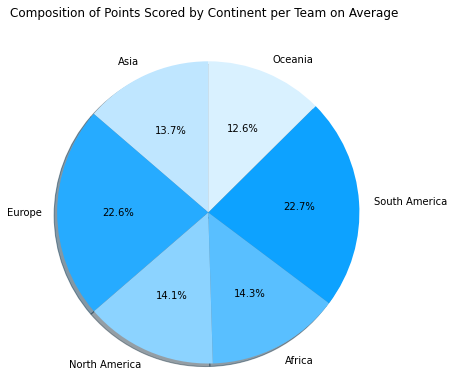

In [24]:
# Points Scored by continent with respect to number of teams
scores = []

# For each continent
for l in labels:
    
    # Computer the previously shown formula
    scores.append( ( sum(fifa[fifa['home_continent'] == l]['home_score']) / home_hash[l] )
                 + ( sum(fifa[fifa['away_continent'] == l]['away_score']) / away_hash[l] ) )
    
    
# Plotting, Labelling
fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle('Composition of Points Scored by Continent per Team on Average')

clrs = ['#bfe6ff', '#26abff', '#8cd3ff', '#59bfff',  '#0da2ff', '#d9f1ff'] # a range of blue values

# Creating the pie chart
ax.pie(scores, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=clrs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Here, Europe is still a large contributor to number of points per continent. It is very closely beaten by South America, however. The other continents hover decently below these two.

It's fascinating how much including the number of teams per continent changed the breakdown of points scored and yellow cards received.

### 4. Hypothesis testing

For this section, we will be testing various hypotheses. This will be done with the help of the `statsmodels` api and the `LinearRegression` function of `sklearn`. For each hypothesis, we will create a model for it and conclude whether the null hypothesis should be rejected or not. For more information on hypothesis testing, consider reading this: [**Statistics How To - Hypothesis Testing**](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/)

**Note**: the alpha value for these hypothesis tests will be `alpha = 0.05`. This is a common threshold for accepting or rejectin the null hypothesis. When the p-value is below this alpha value, we can reject the null hypothesis.

First, I create a dataset to be used in one of the hypothesis tests involving yellow cards. I restrict the games to those occuring during and after 1950 (to acknowledge the inception of yellow cards).

In [25]:
# Dataset of games from 1950 and onwards
fifa_1950 = fifa[fifa['Year'] >= 1950]
fifa_1950

home_team      away_team  home_score  home_xg  home_penalty  \
0            Qatar        Ecuador         0.0      0.3           NaN   
1          England        IR Iran         6.0      2.1           NaN   
2    United States          Wales         1.0      0.8           NaN   
3          Senegal    Netherlands         0.0      0.9           NaN   
4           France      Australia         4.0      4.0           NaN   
..             ...            ...         ...      ...           ...   
904         Sweden          Italy         3.0      NaN           NaN   
905        England          Chile         2.0      NaN           NaN   
906          Spain  United States         3.0      NaN           NaN   
907     Yugoslavia    Switzerland         3.0      NaN           NaN   
908         Brazil         Mexico         4.0      NaN           NaN   

     away_score  away_xg  away_penalty Score  Year  away_yellows  \
0           2.0      1.2           NaN   0–2  2022           2.0   
1           2.0      1.4           NaN   6–2  2022           2.0   
2           1.0      1.5           NaN   1–1  2022           2.0   
3           2.0      0.7           NaN   0–2  2022           1.0   
4           1.0      0.5           NaN   4–1  2022           3.0   
..          ...      ...           ...   ...   ...           ...   
904         2.0      NaN           NaN   3–2  1950           0.0   
905         0.0      NaN           NaN   2–0  1950           0.0   
906         1.0      NaN           NaN   3–1  1950           0.0   
907         0.0      NaN           NaN   3–0  1950           0.0   
908         0.0      NaN           NaN   4–0  1950           0.0   

     home_yellows home_continent away_continent       winner    winner_cont  \
0             4.0           Asia  South America      Ecuador  South America   
1             0.0         Europe           Asia      England         Europe   
2             4.0  North America         Europe         DRAW           DRAW   
3             2.0         Africa         Europe  Netherlands         Europe   
4             0.0         Europe        Oceania       France         Europe   
..            ...            ...            ...          ...            ...   
904           0.0         Europe         Europe       Sweden         Europe   
905           0.0         Europe  South America      England         Europe   
906           0.0         Europe  North America        Spain         Europe   
907           0.0         Europe         Europe   Yugoslavia         Europe   
908           0.0  South America  North America       Brazil  South America   

     yellows  
0        6.0  
1        2.0  
2        6.0  
3        3.0  
4        3.0  
..       ...  
904      0.0  
905      0.0  
906      0.0  
907      0.0  
908      0.0  

[909 rows x 17 columns]

##### **Hypothesis Test 1**: Does Year have an effect on Yellow Cards given?
`Null Hypothesis`: there is no relationship between year and yellow cards given

`Alternate Hypothesis`: yellow cards given is dependent on the year

For this hypothesis test, we will create an R-style formula where `Year` affects `yellows` given in a game. For this, we use the `OLS` function, then apply `fit` to fit the model. The result is a table with lots of information on this regression model. 

For more information on the `OLS` function, visit the [**documentation**](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html) and this page on [**R-style formulas**](https://www.statsmodels.org/stable/example_formulas.html).

What we focus on is the p-value (P>|t|) in the second portion of the summary. 

In [26]:
# Fitting a model for the given R-style formula on our data
summ = smf.ols(formula = 'yellows ~ Year', data=fifa_1950).fit()
print(summ.summary())

                            OLS Regression Results                            
Dep. Variable:                yellows   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     343.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.48e-65
Time:                        05:49:46   Log-Likelihood:                -1909.6
No. Observations:                 909   AIC:                             3823.
Df Residuals:                     907   BIC:                             3833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -115.5270      6.383    -18.099      0.0

In this case, the p-value is so small it's being listed as 0. Since 0 < our alpha of 0.05, it means we can reject the null hypothesis that there is no relationship between year and yellow cards given.

Below, I will plot year against yellow cards given with the regression line gained from this hypothesis test.

In [27]:
# X-axis: year
# y-axis: yellow cards given
X = np.array(fifa_1950['Year']).reshape((-1, 1))
y = fifa_1950['yellows']

# Fitting a model using X and y.
reg = LinearRegression().fit(X, y)
pred = reg.predict(X)

# # Extracting the coefficient and intercept to give the formula (y = mx + b) of the model.
intercept = reg.intercept_
coef = reg.coef_[0]

# The formula for the model is printed below.
print('Model: y =', coef, 'x +', intercept)

Model: y = 0.059403064597850025 x + -115.5270172170097


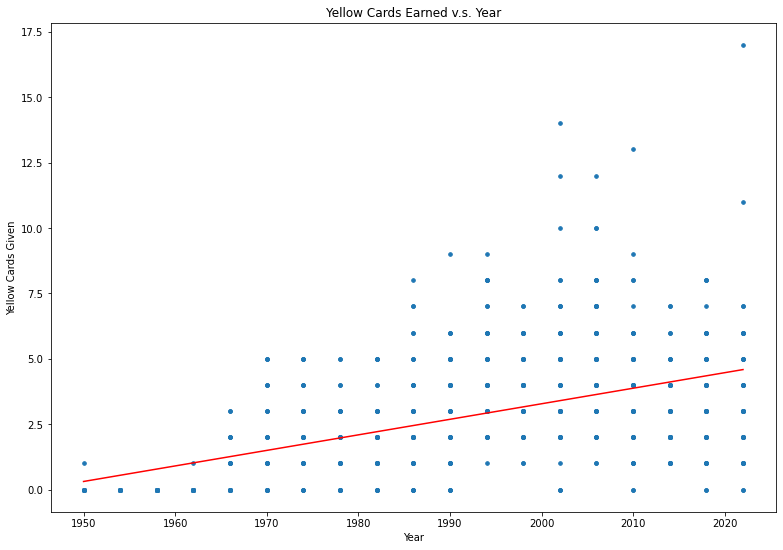

In [28]:
years = list(fifa_1950['Year'].unique())
plt.figure(figsize=(13, 9))
plt.scatter(fifa_1950['Year'], fifa_1950['yellows'], s=13)
plt.plot(X, pred, color='r')

plt.title('Yellow Cards Earned v.s. Year')
plt.xlabel('Year')
plt.ylabel('Yellow Cards Given')   

plt.show()

The regression line clearly shows that yellow cards are being given more as the years increase since its inception. From this, I conclude that either (1) referees became more liberal with the yellow cards they give out, or (2) perhaps players are becoming more vicious in their plays.

The following hypothesis tests do not have an x-axis that is numerical, so applying a regression line is difficult. They will be analyzed through their summary alone.

##### **Hypothesis Test 2**: Does a home team's score depend on the away team's continent?
`Null Hypothesis`: there is no relationship between home team's score and away team's continent

`Alternate Hypothesis`: points scored by the home team are related to the continent of the away team

In [29]:
home_away = smf.ols(formula = 'home_score ~ away_continent', data=fifa).fit()
print(home_away.summary())

                            OLS Regression Results                            
Dep. Variable:             home_score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     5.685
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.55e-05
Time:                        05:49:47   Log-Likelihood:                -1801.3
No. Observations:                 962   AIC:                             3615.
Df Residuals:                     956   BIC:                             3644.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

For this hypothesis test, there are multiple continents to look at. Since Africa is being used as a reference, its stats are in the `Intercept` row.

As can be seen, only 3 continents have p-values less than our alpha of `0.05`. Those continents are `Africa`, `Asia`, and `North America`. For these three continents, the null hypothesis is rejected. There is a relationship between a game's home team points and away team's continent for these three continents.

##### **Hypothesis Test 3**: Does a home team's XG (expected goals) depend on away team's continent
`Null Hypothesis`: there is no relationship between home team's XG and away team's continent

`Alternate Hypothesis`: XG of the home team is affected by the continent of the away team

To explain, XG for a given team is the number of goals that team was expected to score during a game. This number is calculated after the game ends, based on a few criteria: shot accuracy, pass accuracy, percentage of possession of the ball, etc. Read more about what factors into XG [**here**](https://www.charlieintel.com/what-is-expected-goals-in-fifa-22-how-xg-is-calculated/142457/).

In [30]:
home_xg = smf.ols(formula = 'home_xg ~ away_continent', data=fifa).fit()
print(home_xg.summary())

                            OLS Regression Results                            
Dep. Variable:                home_xg   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.616
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0278
Time:                        05:49:47   Log-Likelihood:                -150.99
No. Observations:                 126   AIC:                             314.0
Df Residuals:                     120   BIC:                             331.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

For this hypothesis test, there are only two continents that have p-values below our alpha of `0.05`: `Africa` and `South America`. For these continents, we can reject the null hypothesis: there is a relationship between a home team's XG and the away team's continent.

### 5. Communication of Insights Attained

#### Insights
Throughout this report, we have created plots and analyzed trends. The following are the ones I consider most important:

1. Teams labelled as `home` tend to score more than those labelled as `away`.
2. Since their creation, yellow cards given in a game have increased over time.
    - This could be attributed to referees becoming more strict, or players becoming more vicious.
3. Europe is the continent with the most wins, with South America in second.
    - EU is also the continent with the most teams, with SA following behind again.
4. Europe has scored the most points and earned the most yellow cards over time. 
    - When accounting for the number of teams in each continent, on average, the continent with a team earning the most yellow cards is Africa. For points scored, South America wins by just 0.1% over Europe.
5. Morocco is a dark horse in this year's World Cup, given they made it to semi-final and are fighting for third place despite never making it this far in the past.

#### Final Thoughts

From this tutorial, I hope you learned more about data analysis in a fun and interesting way. We started by learning about the process of cleansing data and data management. We then created a wide variety of plots, including scatter plots, violin plots, line plots, and pie charts. From those plots, we noticed trends and thought about why these trends might have occurred. We even learned about hypothesis testing using helpful python APIs and functions. 

This project was meant to show you all about the Data Science Pipeline: 
1. Data Collection
2. Data Cleaning/Management
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Communication of Insights Attained

Performing data science becomes much more enjoyable when the subject at hand is one you're interested in, as I have done with this project. If you plan to follow along with this tutorial, consider other possible questions we could have asked, plots we could have created, and hypotheses we could have tested. And hopefully, you will take these skills you've gained and use them to perform data analysis on data that interests you!